### Chargement des tables raw

In [3]:
import pandas as pd

# Chargement des données en spécifiant le séparateur
raw_accounts_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\accounts.csv", sep=';')
raw_products_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\products.csv", sep=';')
raw_sales_teams_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\sales_teams.csv", sep=';')
raw_sales_pipeline_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\sales_pipeline.csv", sep=';')


# Étape 0 : Correction des données dans `raw_sales_pipeline_df`
# Remplacer "GTXPro" par "GTX Pro" dans la colonne `product`
raw_sales_pipeline_df['product'] = raw_sales_pipeline_df['product'].replace('GTXPro', 'GTX Pro')
# Étape 1 : Jointure des tables
# 1.1 Joindre `accounts` et `sales_pipeline` sur la colonne `account`
raw_merged_df = raw_sales_pipeline_df.merge(raw_accounts_df, on="account", how="left")

# 1.2 Joindre `products` à la table consolidée sur la colonne `product`
raw_merged_df = raw_merged_df.merge(raw_products_df, on="product", how="left")

# 1.3 Joindre `sales_teams` sur `sales_agent`
raw_merged_df = raw_merged_df.merge(raw_sales_teams_df, on="sales_agent", how="left")

# Sauvegarder la table raw consolidée pour analyse future
raw_merged_df.to_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\crm_hetic_bronze\raw_merged_bronze_table.csv", index=False)
# Vérification du résultat final
print("Table consolidée :")
print(raw_merged_df.head())


Table consolidée :
  opportunity_id      sales_agent         product  account deal_stage  \
0       1C1I7A6R      Moses Frase  GTX Plus Basic  Cancity        Won   
1       Z063OYW0  Darcel Schlecht         GTX Pro    Isdom        Won   
2       EC4QE1BX  Darcel Schlecht      MG Special  Cancity        Won   
3       MV1LWRNH      Moses Frase       GTX Basic  Codehow        Won   
4       PE84CX4O        Zane Levy       GTX Basic   Hatfan        Won   

  engage_date  close_date  close_value    sector  year_established  revenue  \
0  20/10/2016  01/03/2017       1054.0    retail            2001.0   718.62   
1  25/10/2016  11/03/2017       4514.0   medical            2002.0  3178.24   
2  25/10/2016  07/03/2017         50.0    retail            2001.0   718.62   
3  25/10/2016  09/03/2017        588.0  software            1998.0  2714.90   
4  25/10/2016  02/03/2017        517.0  services            1982.0   792.46   

   employees office_location     subsidiary_of series  sales_price 

In [4]:
raw_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   opportunity_id    8800 non-null   object 
 1   sales_agent       8800 non-null   object 
 2   product           8800 non-null   object 
 3   account           7375 non-null   object 
 4   deal_stage        8800 non-null   object 
 5   engage_date       8300 non-null   object 
 6   close_date        6711 non-null   object 
 7   close_value       6711 non-null   float64
 8   sector            7375 non-null   object 
 9   year_established  7375 non-null   float64
 10  revenue           7375 non-null   float64
 11  employees         7375 non-null   float64
 12  office_location   7375 non-null   object 
 13  subsidiary_of     1292 non-null   object 
 14  series            8800 non-null   object 
 15  sales_price       8800 non-null   int64  
 16  manager           8800 non-null   object 


In [5]:
print(raw_merged_df.isnull().sum())  # Vérifie les valeurs manquantes dans chaque colonne.


opportunity_id         0
sales_agent            0
product                0
account             1425
deal_stage             0
engage_date          500
close_date          2089
close_value         2089
sector              1425
year_established    1425
revenue             1425
employees           1425
office_location     1425
subsidiary_of       7508
series                 0
sales_price            0
manager                0
regional_office        0
dtype: int64


In [6]:
raw_merged_df

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,manager,regional_office
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,20/10/2016,01/03/2017,1054.0,retail,2001.0,718.62,2448.0,United States,NaN,GTX,1096,Dustin Brinkmann,Central
1,Z063OYW0,Darcel Schlecht,GTX Pro,Isdom,Won,25/10/2016,11/03/2017,4514.0,medical,2002.0,3178.24,4540.0,United States,NaN,GTX,4821,Melvin Marxen,Central
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,25/10/2016,07/03/2017,50.0,retail,2001.0,718.62,2448.0,United States,NaN,MG,55,Melvin Marxen,Central
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,25/10/2016,09/03/2017,588.0,software,1998.0,2714.90,2641.0,United States,Acme Corporation,GTX,550,Dustin Brinkmann,Central
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,25/10/2016,02/03/2017,517.0,services,1982.0,792.46,1299.0,United States,NaN,GTX,550,Summer Sewald,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MG,3393,Dustin Brinkmann,Central
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MG,3393,Dustin Brinkmann,Central
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MG,3393,Dustin Brinkmann,Central
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MG,3393,Dustin Brinkmann,Central


### Preprocessing

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime

def preprocess_crm_data(df):
    # Copie du DataFrame pour éviter les modifications sur l'original
    processed_df = df.copy()
    
    # 1. Renommage des colonnes pour correspondre aux noms utilisés précédemment
    processed_df.rename(columns={
        'engage_date': 'engage_at',
        'close_date': 'close_at',
        'employees': 'number_of_employees',
        'year_established': 'year_founded_at'
    }, inplace=True)
    
    # 2. Suppression des lignes où la colonne account est vide
    processed_df = processed_df.dropna(subset=['account'])
    
    # 3. Suppression des colonnes inutiles
    processed_df = processed_df.drop(['subsidiary_of', 'opportunity_id', 'manager'], axis=1)
    
    # 4.  Conversion des dates
    processed_df['engage_at'] = pd.to_datetime(processed_df['engage_at'], format='%d/%m/%Y')
    processed_df['close_at'] = pd.to_datetime(processed_df['close_at'], format='%d/%m/%Y')
    
    # 5. Calcul de la durée du cycle de vente (en jours)
    processed_df['sales_cycle_duration'] = (processed_df['close_at'] - processed_df['engage_at']).dt.days
    
    # 6. Traitement des valeurs manquantes pour sales_price
    median_price_by_product = processed_df.groupby('product')['sales_price'].transform('median')
    processed_df['sales_price'] = processed_df['sales_price'].fillna(median_price_by_product)
    
    # 7. Nettoyage et conversion de la colonne revenue
    def clean_revenue(value):
        try:
            return float(value)
        except ValueError:
            return np.nan
    
    processed_df['revenue'] = processed_df['revenue'].apply(clean_revenue)
    
    # 8. Feature Engineering
    
    # 8.1 Catégorisation de la taille de l'entreprise
    employee_bins = [0, 1000, 5000, 10000, float('inf')]
    employee_labels = ['Small', 'Medium', 'Large', 'Enterprise']
    processed_df['company_size'] = pd.cut(processed_df['number_of_employees'], 
                                          bins=employee_bins, 
                                          labels=employee_labels)
    
    # 8.2 Âge de l'entreprise
    current_year = datetime.now().year
    processed_df['company_age'] = current_year - processed_df['year_founded_at']
    
    age_bins = [0, 10, 20, float('inf')]
    age_labels = ['Young', 'Mature', 'Established']
    processed_df['company_age_category'] = pd.cut(processed_df['company_age'],
                                                  bins=age_bins,
                                                  labels=age_labels)
    
    # 8.3 Indicateurs basés sur le deal_stage
    processed_df['is_won'] = (processed_df['deal_stage'] == 'Won').astype(int)
    
    # 8.4 Saisonnalité
    processed_df['engagement_month'] = processed_df['engage_at'].dt.month
    processed_df['engagement_quarter'] = processed_df['engage_at'].dt.quarter
    
    # 8.5 Complexité du produit (basée sur le prix)
    price_bins = [0, 1000, 3000, float('inf')]
    price_labels = ['Basic', 'Intermediate', 'Complex']
    processed_df['product_complexity'] = pd.cut(processed_df['sales_price'],
                                                bins=price_bins,
                                                labels=price_labels)
    
    # 9. KPIs par agent
    agent_metrics = processed_df.groupby('sales_agent').agg({
        'is_won': 'mean',
        'close_value': 'mean'
    }).rename(columns={
        'is_won': 'agent_conversion_rate',
        'close_value': 'agent_avg_deal_value'
    })
    
    # Fusion des métriques par agent avec le DataFrame principal
    processed_df = processed_df.merge(
        agent_metrics,
        left_on='sales_agent',
        right_index=True,
        how='left'
    )
    
    # 10. One-hot encoding pour les variables catégorielles
    categorical_columns = ['sector', 'office_location', 'regional_office', 'product', 'series']
    processed_df = pd.get_dummies(processed_df, columns=categorical_columns, prefix=categorical_columns)
    
    return processed_df

# Application du prétraitement
preprocessed_df = preprocess_crm_data(raw_merged_df)

# Vérification des colonnes disponibles
print("Colonnes disponibles dans le DataFrame:")
print(preprocessed_df.columns.tolist())

# Vérification des colonnes numériques
numeric_columns = ['sales_cycle_duration', 'company_age', 
                   'agent_conversion_rate', 'agent_avg_deal_value']

print("\nStatistiques descriptives des features numériques:")
print(preprocessed_df.describe())

# Sauvegarde du DataFrame prétraité
preprocessed_df.to_csv('preprocessed_crm_data.csv', index=False)

# Affichage des valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(preprocessed_df.isnull().sum())


Colonnes disponibles dans le DataFrame:
['sales_agent', 'account', 'deal_stage', 'engage_at', 'close_at', 'close_value', 'year_founded_at', 'revenue', 'number_of_employees', 'sales_price', 'sales_cycle_duration', 'company_size', 'company_age', 'company_age_category', 'is_won', 'engagement_month', 'engagement_quarter', 'product_complexity', 'agent_conversion_rate', 'agent_avg_deal_value', 'sector_employment', 'sector_entertainment', 'sector_finance', 'sector_marketing', 'sector_medical', 'sector_retail', 'sector_services', 'sector_software', 'sector_technolgy', 'sector_telecommunications', 'office_location_Belgium', 'office_location_Brazil', 'office_location_China', 'office_location_Germany', 'office_location_Italy', 'office_location_Japan', 'office_location_Jordan', 'office_location_Kenya', 'office_location_Korea', 'office_location_Norway', 'office_location_Panama', 'office_location_Philipines', 'office_location_Poland', 'office_location_Romania', 'office_location_United States', 'regi

In [8]:
preprocessed_df

,sales_agent,account,deal_stage,engage_at,close_at,close_value,year_founded_at,revenue,number_of_employees,sales_price,...,product_GTK 500,product_GTX Basic,product_GTX Plus Basic,product_GTX Plus Pro,product_GTX Pro,product_MG Advanced,product_MG Special,series_GTK,series_GTX,series_MG
0,Moses Frase,Cancity,Won,2016-10-20,2017-03-01,1054.0,2001.0,718.62,2448.0,1096,...,False,False,True,False,False,False,False,False,True,False
1,Darcel Schlecht,Isdom,Won,2016-10-25,2017-03-11,4514.0,2002.0,3178.24,4540.0,4821,...,False,False,False,False,True,False,False,False,True,False
2,Darcel Schlecht,Cancity,Won,2016-10-25,2017-03-07,50.0,2001.0,718.62,2448.0,55,...,False,False,False,False,False,False,True,False,False,True
3,Moses Frase,Codehow,Won,2016-10-25,2017-03-09,588.0,1998.0,2714.90,2641.0,550,...,False,True,False,False,False,False,False,False,True,False
4,Zane Levy,Hatfan,Won,2016-10-25,2017-03-02,517.0,1982.0,792.46,1299.0,550,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,Versie Hillebrand,Konmatfix,Prospecting,NaT,NaT,NaN,1985.0,375.43,1190.0,55,...,False,False,False,False,False,False,True,False,False,True
8762,Versie Hillebrand,Opentech,Prospecting,NaT,NaT,NaN,1994.0,355.23,853.0,55,...,False,False,False,False,False,False,True,False,False,True
8763,Versie Hillebrand,Rundofase,Prospecting,NaT,NaT,NaN,1983.0,1008.06,1238.0,55,...,False,False,False,False,False,False,True,False,False,True
8790,Versie Hillebrand,Ganjaflex,Prospecting,NaT,NaT,NaN,1995.0,5158.71,17479.0,3393,...,False,False,False,False,False,True,False,False,False,True


### Analyse Exploratoire de données:

Structure du dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 7375 entries, 0 to 8791
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   sales_agent                    7375 non-null   object        
 1   account                        7375 non-null   object        
 2   deal_stage                     7375 non-null   object        
 3   engage_at                      7212 non-null   datetime64[ns]
 4   close_at                       6711 non-null   datetime64[ns]
 5   close_value                    6711 non-null   float64       
 6   year_founded_at                7375 non-null   float64       
 7   revenue                        7375 non-null   float64       
 8   number_of_employees            7375 non-null   float64       
 9   sales_price                    7375 non-null   int64         
 10  sales_cycle_duration           6711 non-null   float64       
 1

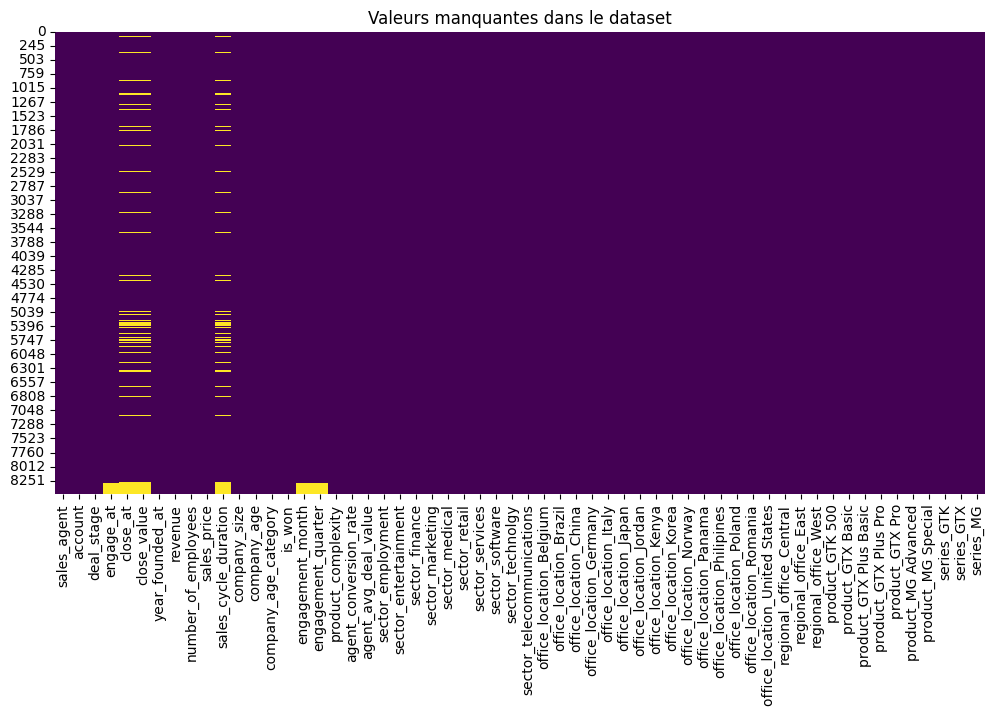

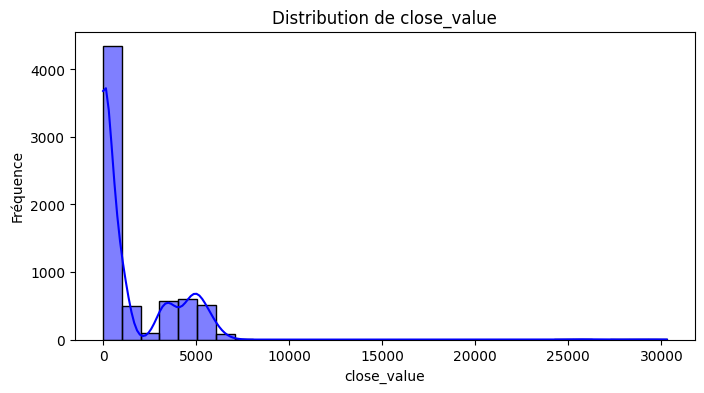

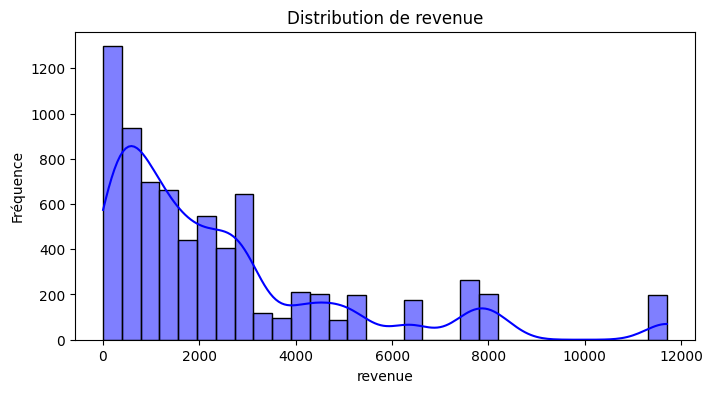

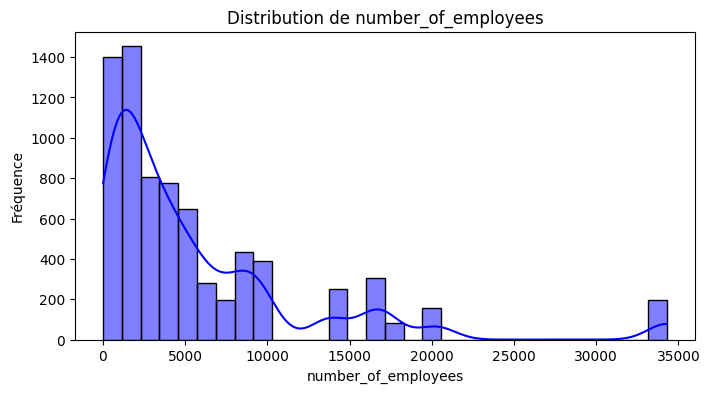

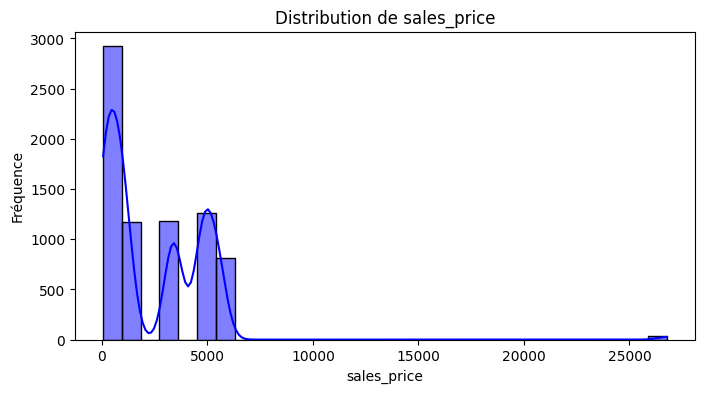

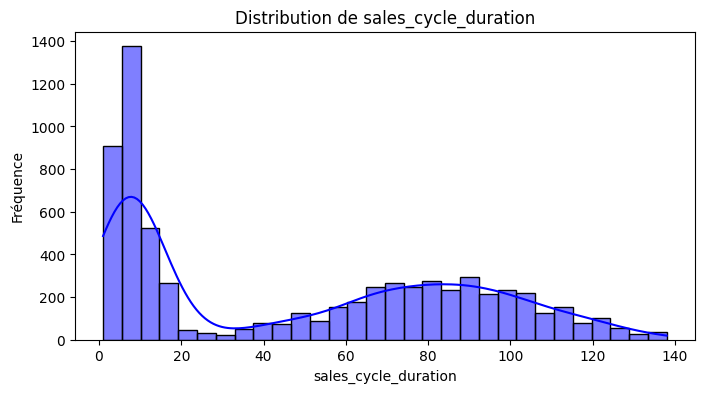

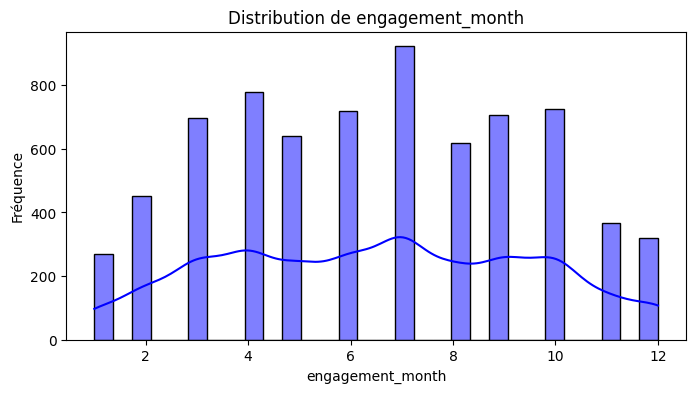

C:\Users\liman\AppData\Local\Temp\ipykernel_102296\2018961072.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_accounts.values, y=top_accounts.index, palette="viridis")


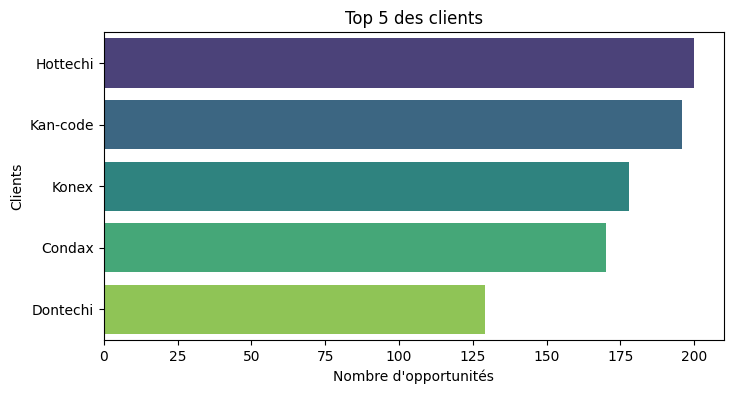

C:\Users\liman\AppData\Local\Temp\ipykernel_102296\2018961072.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deal_stage_counts.values, y=deal_stage_counts.index, palette="viridis")


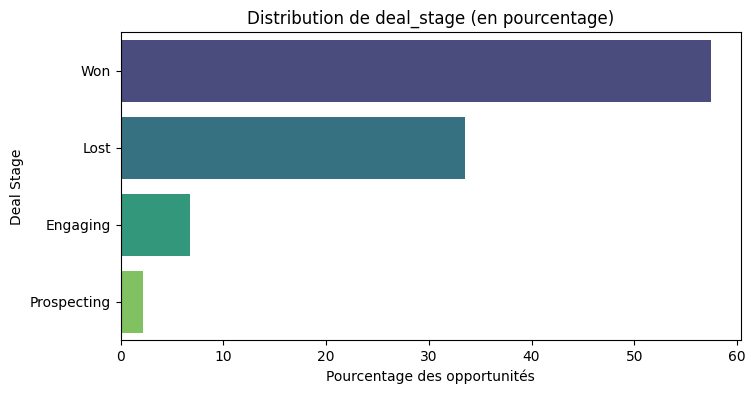

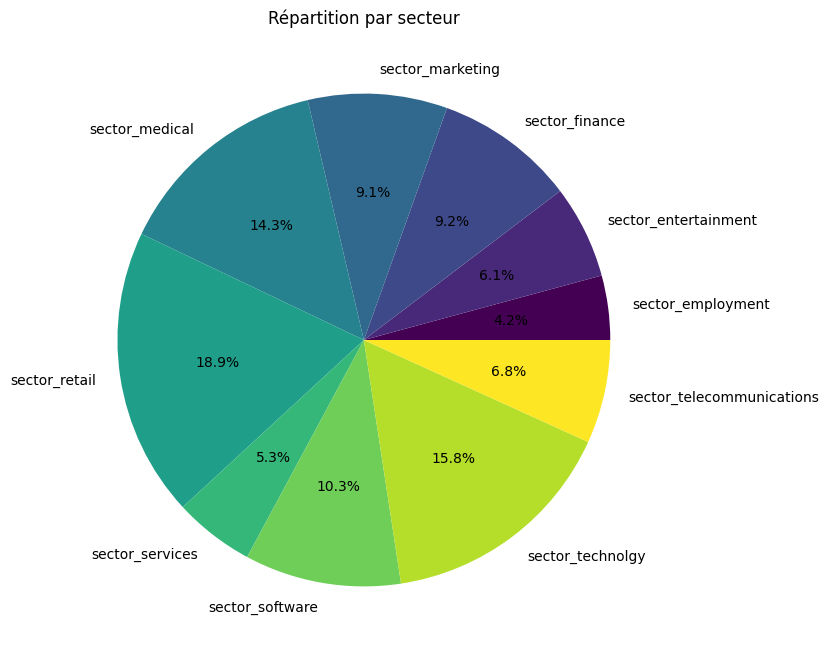

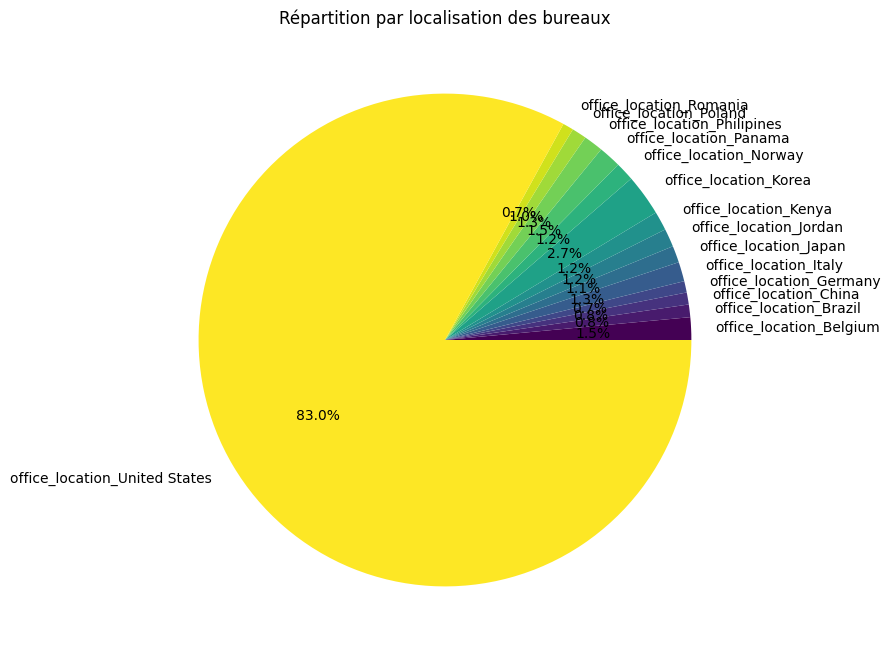

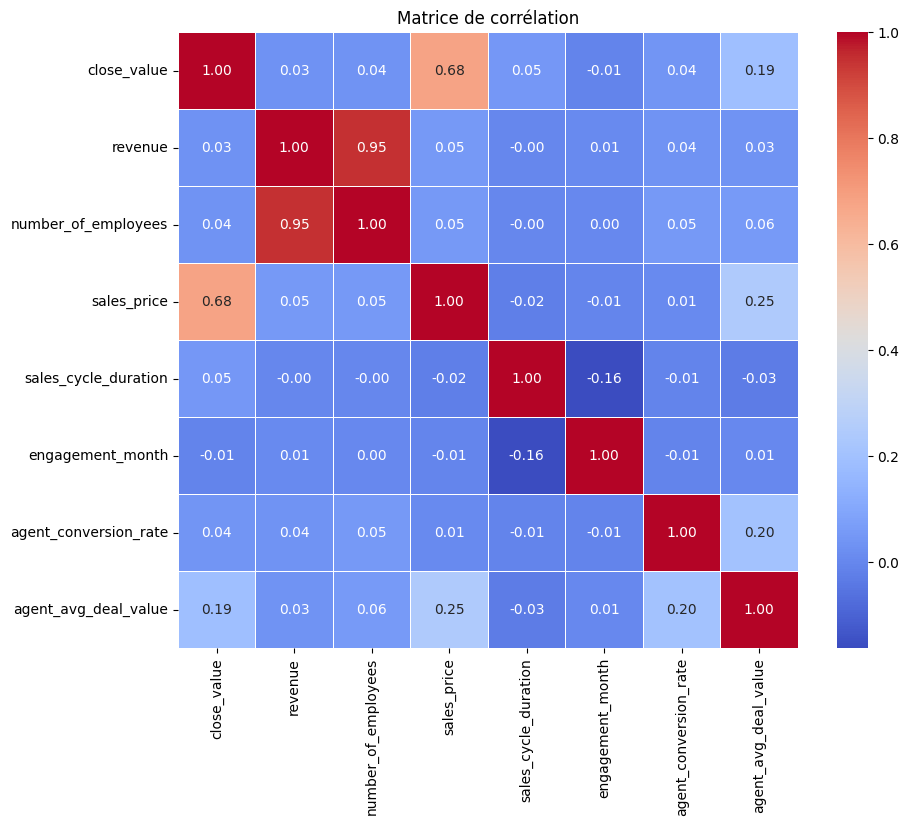

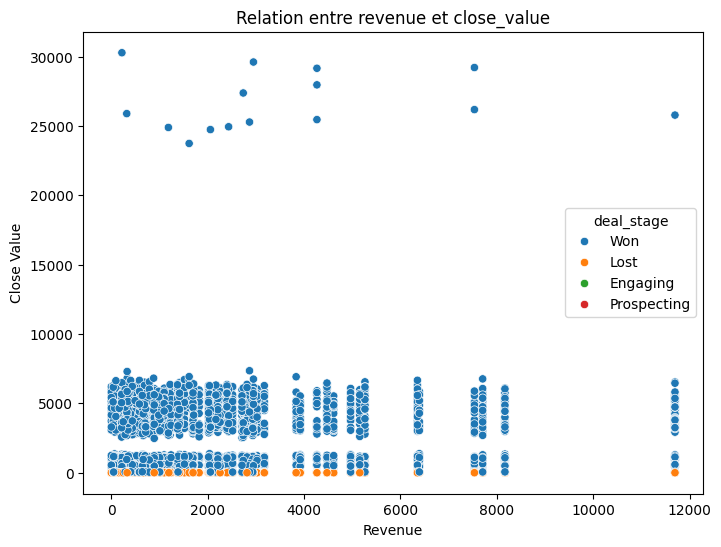

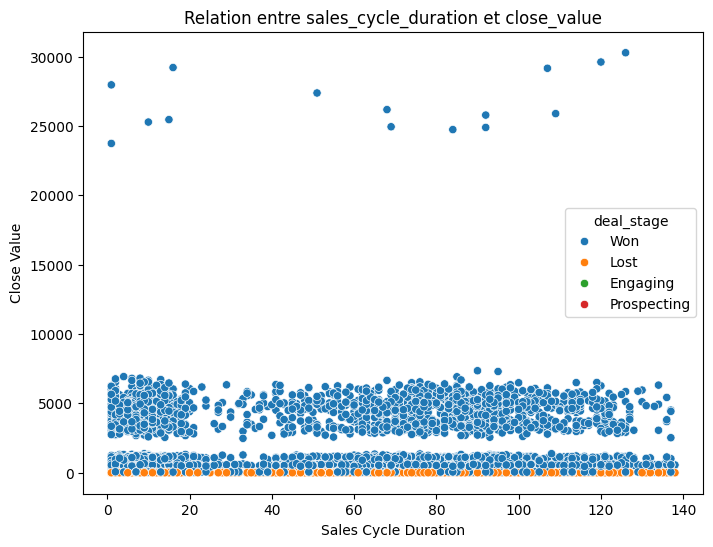

C:\Users\liman\AppData\Local\Temp\ipykernel_102296\2018961072.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_agents.values, y=top_agents.index, palette="viridis")


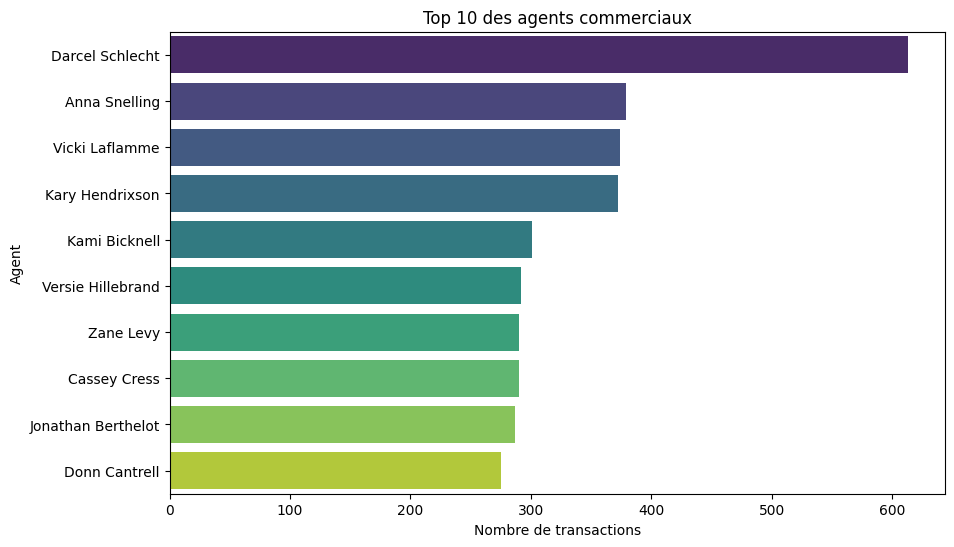

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vérification de la structure et des premières lignes du dataframe
print("Structure du dataframe :")
print(preprocessed_df.info())

print("\nRésumé statistique :")
print(preprocessed_df.describe())

# 1. Analyse des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(preprocessed_df.isnull().sum())

# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(preprocessed_df.isnull(), cbar=False, cmap="viridis")
plt.title("Valeurs manquantes dans le dataset")
plt.show()

# 2. Analyse de la distribution des variables numériques clés
num_cols = ["close_value", "revenue", "number_of_employees", "sales_price", "sales_cycle_duration", "engagement_month"]

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(preprocessed_df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

# 3. Distribution des variables catégoriques clés
# Distribution de account (Top 5 des clients)
top_accounts = preprocessed_df['account'].value_counts().head(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_accounts.values, y=top_accounts.index, palette="viridis")
plt.title("Top 5 des clients")
plt.xlabel("Nombre d'opportunités")
plt.ylabel("Clients")
plt.show()

# Distribution de deal_stage (avec pourcentage)
deal_stage_counts = preprocessed_df['deal_stage'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 4))
sns.barplot(x=deal_stage_counts.values, y=deal_stage_counts.index, palette="viridis")
plt.title("Distribution de deal_stage (en pourcentage)")
plt.xlabel("Pourcentage des opportunités")
plt.ylabel("Deal Stage")
plt.show()

# 4. Distribution des secteurs (pie chart)
sector_counts = preprocessed_df.filter(like="sector_").sum()
plt.figure(figsize=(8, 8))
sector_counts.plot.pie(autopct='%1.1f%%', cmap="viridis")
plt.title("Répartition par secteur")
plt.ylabel("")
plt.show()

# 5. Distribution des localisations des bureaux (pie chart)
office_counts = preprocessed_df.filter(like="office_location_").sum()
plt.figure(figsize=(8, 8))
office_counts.plot.pie(autopct='%1.1f%%', cmap="viridis")
plt.title("Répartition par localisation des bureaux")
plt.ylabel("")
plt.show()


# 6. Matrice de corrélation
num_cols_corr = ["close_value", "revenue", "number_of_employees", "sales_price", "sales_cycle_duration", "engagement_month",'agent_conversion_rate', 'agent_avg_deal_value']

plt.figure(figsize=(10, 8))
correlation_matrix = preprocessed_df[num_cols_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

# 7. Relations entre certaines variables
# Relation entre `revenue` et `close_value`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=preprocessed_df, x="revenue", y="close_value", hue="deal_stage")
plt.title("Relation entre revenue et close_value")
plt.xlabel("Revenue")
plt.ylabel("Close Value")
plt.show()

# Relation entre `sales_cycle_duration` et `close_value`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=preprocessed_df, x="sales_cycle_duration", y="close_value", hue="deal_stage")
plt.title("Relation entre sales_cycle_duration et close_value")
plt.xlabel("Sales Cycle Duration")
plt.ylabel("Close Value")
plt.show()

# 8. Performances des agents commerciaux
top_agents = preprocessed_df["sales_agent"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_agents.values, y=top_agents.index, palette="viridis")
plt.title("Top 10 des agents commerciaux")
plt.xlabel("Nombre de transactions")
plt.ylabel("Agent")
plt.show()


C:\Users\liman\AppData\Local\Temp\ipykernel_102296\549550085.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_summary.values, y=product_summary.index, palette="viridis")


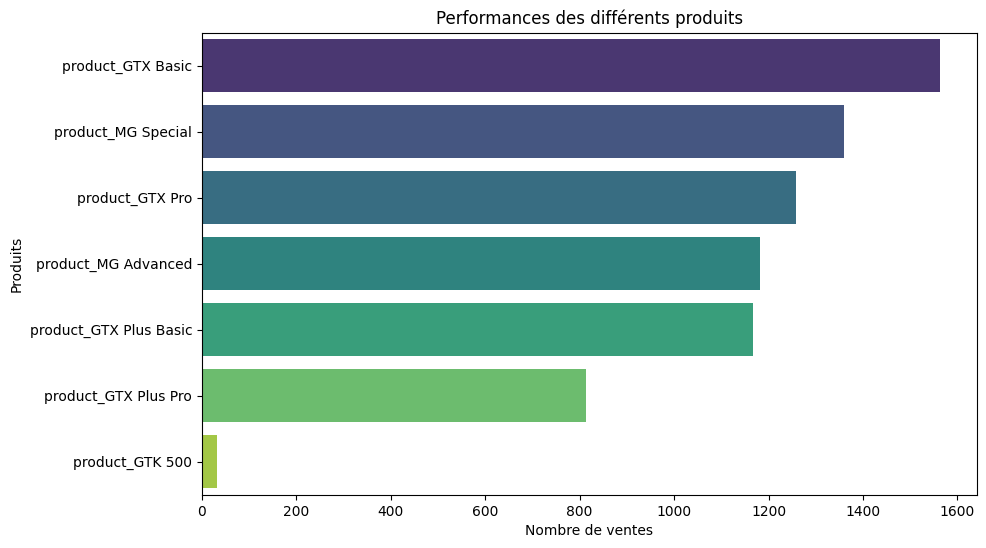

In [10]:
# 9. Performances des produits (sans inclure product_complexity)
# Filtrer uniquement les colonnes commençant par 'product_' mais exclure 'product_complexity'
product_cols = [col for col in preprocessed_df.columns if col.startswith("product_") and col != "product_complexity"]

# Conversion des colonnes catégorielles en numériques (si nécessaire)
preprocessed_df[product_cols] = preprocessed_df[product_cols].apply(lambda x: x.cat.codes if x.dtypes.name == 'category' else x)
preprocessed_df[product_cols] = preprocessed_df[product_cols].astype(int)

# Calcul de la somme pour chaque produit
product_summary = preprocessed_df[product_cols].sum().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=product_summary.values, y=product_summary.index, palette="viridis")
plt.title("Performances des différents produits")
plt.xlabel("Nombre de ventes")
plt.ylabel("Produits")
plt.show()


C:\Users\liman\AppData\Local\Temp\ipykernel_102296\3083640191.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_opportunities["sales_margin"] = won_opportunities["close_value"] - won_opportunities["sales_price"]
C:\Users\liman\AppData\Local\Temp\ipykernel_102296\3083640191.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


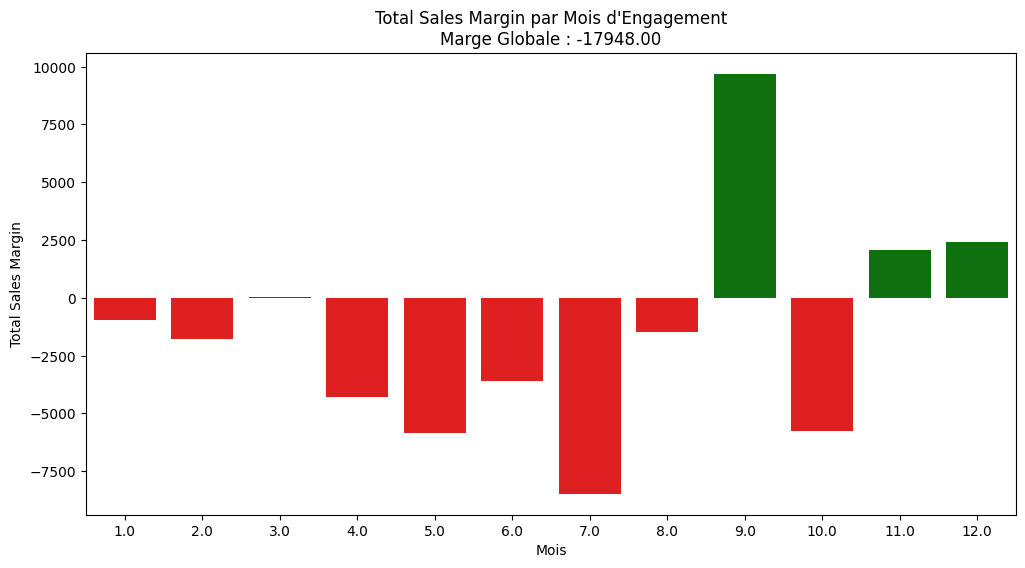

C:\Users\liman\AppData\Local\Temp\ipykernel_102296\3083640191.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


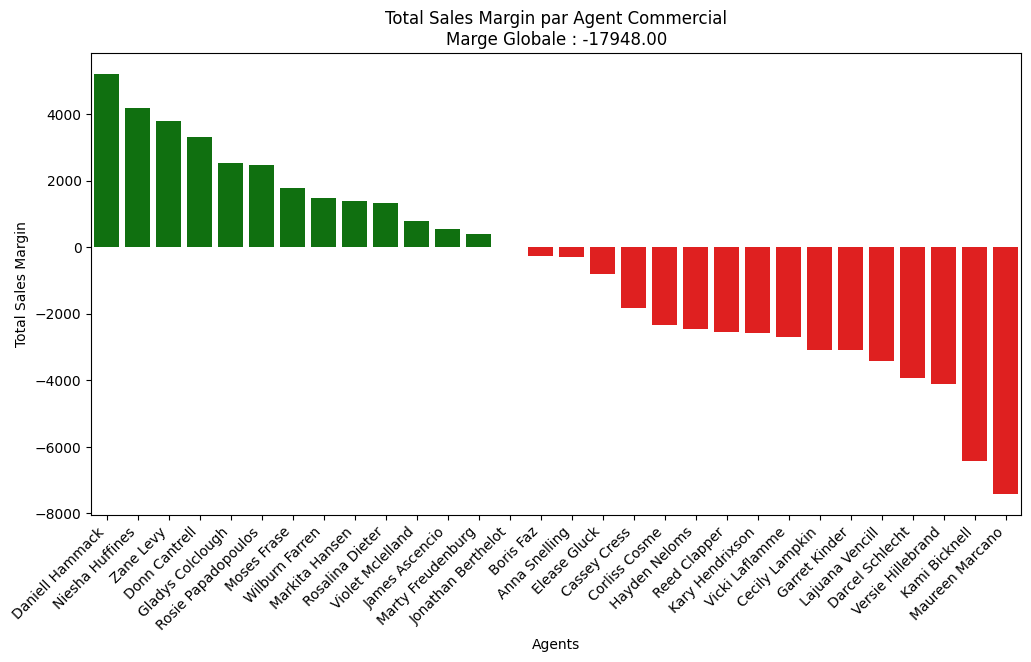

C:\Users\liman\AppData\Local\Temp\ipykernel_102296\3083640191.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


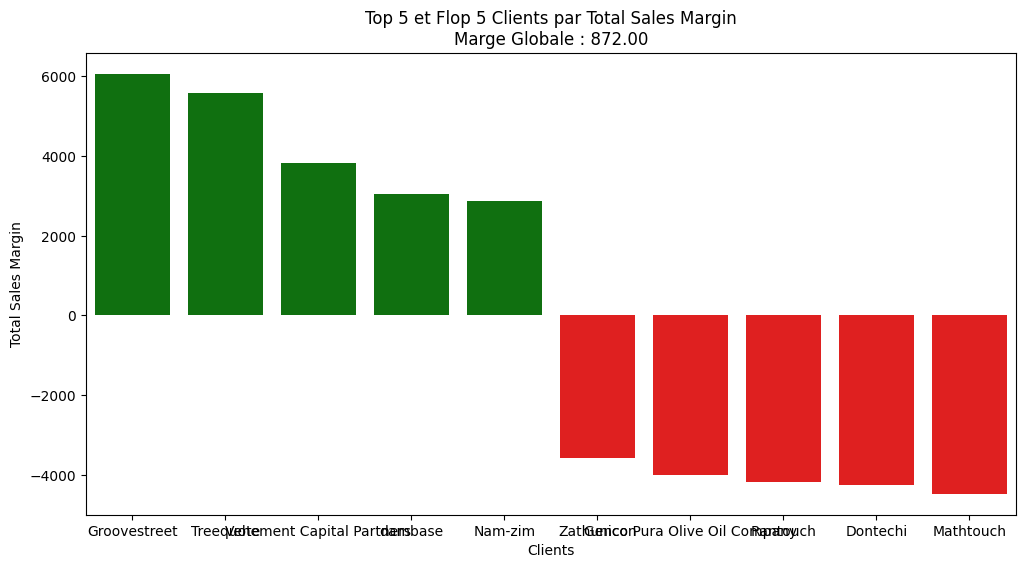

C:\Users\liman\AppData\Local\Temp\ipykernel_102296\3083640191.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_opportunities["sector"] = won_opportunities[sector_cols].idxmax(axis=1).str.replace("sector_", "")
C:\Users\liman\AppData\Local\Temp\ipykernel_102296\3083640191.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


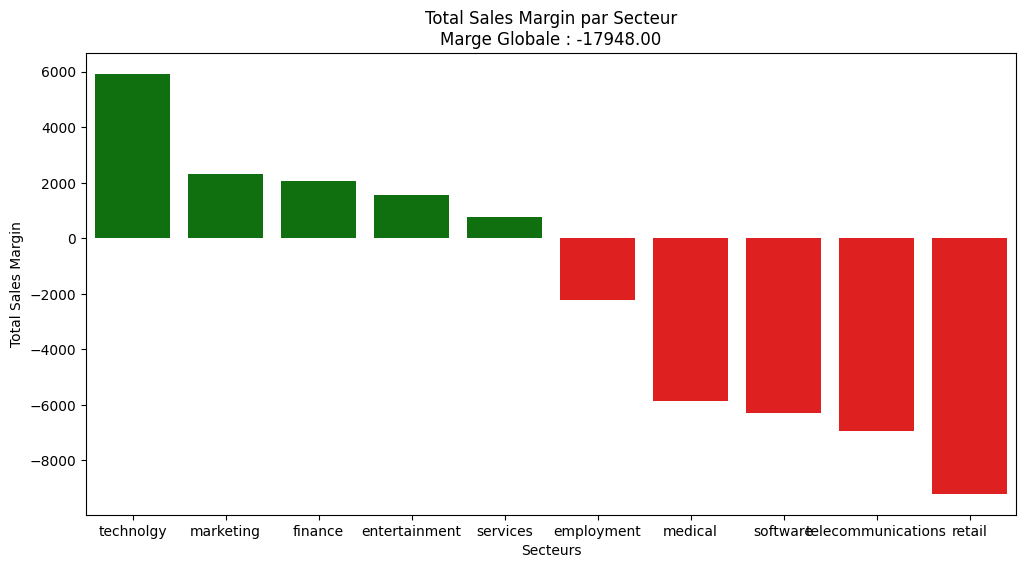

C:\Users\liman\AppData\Local\Temp\ipykernel_102296\3083640191.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_opportunities["office_location"] = won_opportunities[office_cols].idxmax(axis=1).str.replace("office_location_", "")
C:\Users\liman\AppData\Local\Temp\ipykernel_102296\3083640191.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


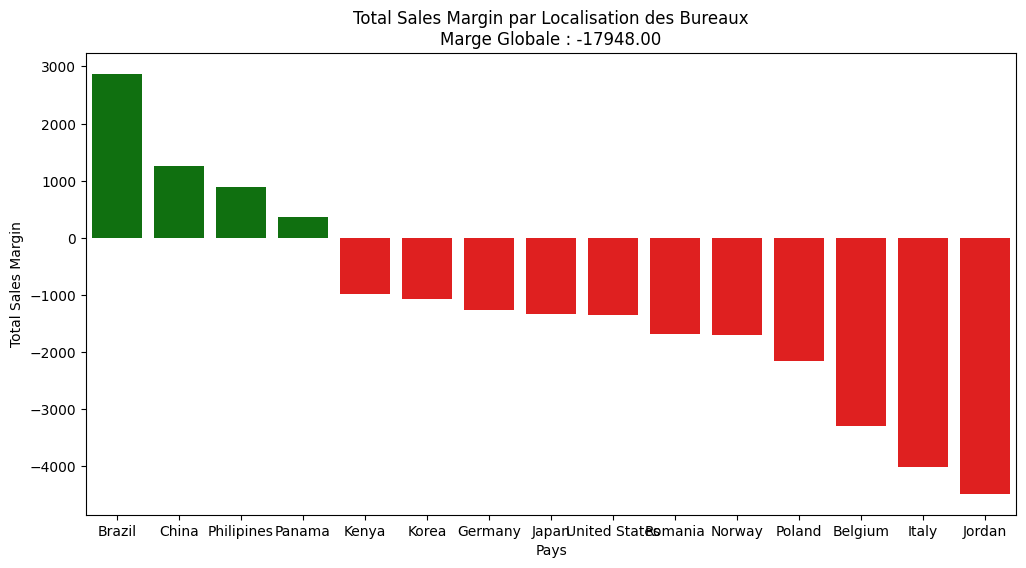

C:\Users\liman\AppData\Local\Temp\ipykernel_102296\3083640191.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_opportunities["product"] = won_opportunities[product_cols].idxmax(axis=1).str.replace("product_", "")
C:\Users\liman\AppData\Local\Temp\ipykernel_102296\3083640191.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


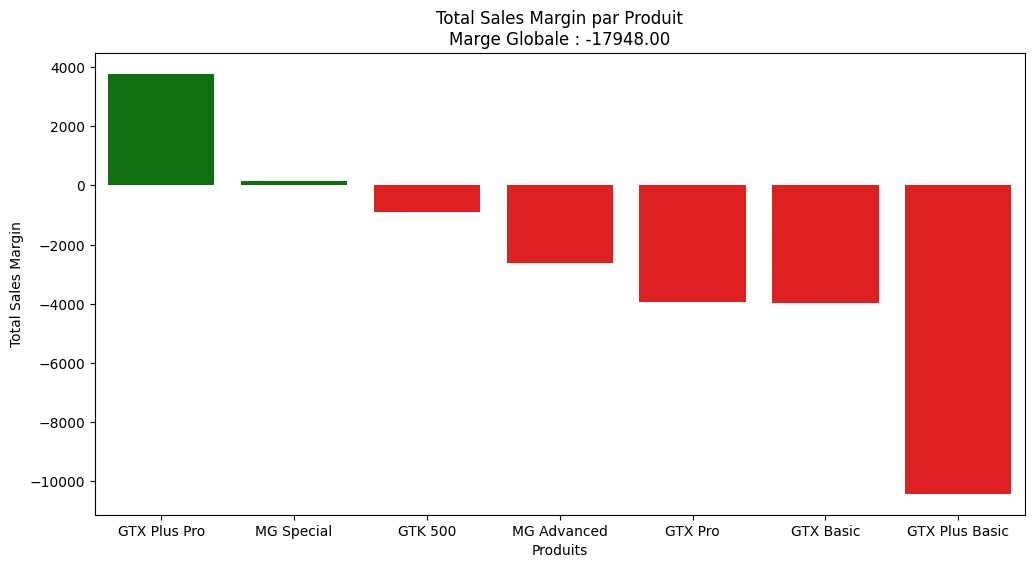

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer uniquement les opportunités "Won"
won_opportunities = preprocessed_df[preprocessed_df["deal_stage"] == "Won"]

# Créer la variable `sales_margin`
won_opportunities["sales_margin"] = won_opportunities["close_value"] - won_opportunities["sales_price"]

# Fonction pour créer des plots de distribution du total de `sales_margin`
def plot_sales_margin_by_category(data, category, title, x_label, y_label, figsize=(12, 6), top_n=None, rotate_labels=False):
    sales_margin_summary = data.groupby(category)["sales_margin"].sum().sort_values(ascending=False)
    
    # Filtrer pour les Top N et Flop N si nécessaire
    if top_n:
        sales_margin_summary = pd.concat([sales_margin_summary.head(top_n), sales_margin_summary.tail(top_n)])
    
    # Définir les couleurs (vert pour positif, rouge pour négatif)
    colors = sales_margin_summary.apply(lambda x: 'green' if x > 0 else 'red').tolist()
    
    plt.figure(figsize=figsize)
    sns.barplot(
        x=sales_margin_summary.index,
        y=sales_margin_summary.values,
        palette=colors
    )
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{title}\nMarge Globale : {sales_margin_summary.sum():.2f}")
    
    # Rotation des labels si demandé
    if rotate_labels:
        plt.xticks(rotation=45, ha='right')
    
    plt.show()

# Calcul des marges mensuelles
monthly_margin_summary = won_opportunities.groupby("engagement_month")["sales_margin"].sum().sort_index()

# Définir les couleurs (vert pour positif, rouge pour négatif)
colors = ["green" if margin > 0 else "red" for margin in monthly_margin_summary.values]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=monthly_margin_summary.index,
    y=monthly_margin_summary.values,
    palette=colors
)
plt.xlabel("Mois")
plt.ylabel("Total Sales Margin")
plt.title(f"Total Sales Margin par Mois d'Engagement\nMarge Globale : {monthly_margin_summary.sum():.2f}")
plt.show()

# Distribution par sales_agent (avec rotation des noms des agents)
plot_sales_margin_by_category(
    won_opportunities,
    "sales_agent",
    "Total Sales Margin par Agent Commercial",
    x_label="Agents",
    y_label="Total Sales Margin",
    rotate_labels=True
)

# Distribution par account (Top 5 et Flop 5)
plot_sales_margin_by_category(
    won_opportunities,
    "account",
    "Top 5 et Flop 5 Clients par Total Sales Margin",
    x_label="Clients",
    y_label="Total Sales Margin",
    top_n=5
)

# Distribution par sector
sector_cols = [col for col in preprocessed_df.columns if col.startswith("sector_")]
won_opportunities["sector"] = won_opportunities[sector_cols].idxmax(axis=1).str.replace("sector_", "")
plot_sales_margin_by_category(
    won_opportunities,
    "sector",
    "Total Sales Margin par Secteur",
    x_label="Secteurs",
    y_label="Total Sales Margin"
)

# Distribution par office_location
office_cols = [col for col in preprocessed_df.columns if col.startswith("office_location_")]
won_opportunities["office_location"] = won_opportunities[office_cols].idxmax(axis=1).str.replace("office_location_", "")
plot_sales_margin_by_category(
    won_opportunities,
    "office_location",
    "Total Sales Margin par Localisation des Bureaux",
    x_label="Pays",
    y_label="Total Sales Margin"
)

# Distribution par produit
product_cols = [col for col in preprocessed_df.columns if col.startswith("product_") and col != "product_complexity"]
won_opportunities["product"] = won_opportunities[product_cols].idxmax(axis=1).str.replace("product_", "")
plot_sales_margin_by_category(
    won_opportunities,
    "product",
    "Total Sales Margin par Produit",
    x_label="Produits",
    y_label="Total Sales Margin"
)


#### 1.2 Traitement complémentaire des Valeurs Manquantes et Colonnes

Avant de passer aux étapes de modélisation et d'analyse, nous devons traiter les valeurs manquantes et ajuster certaines colonnes pour garantir la cohérence et la qualité des données. Voici les étapes prévues :

- **Création de la colonne `revenue_per_employee`** :
  - Une nouvelle colonne sera calculée comme le rapport entre `revenue` (chiffre d'affaires annuel) et `number_of_employees`, ce qui permet d’évaluer la productivité moyenne des employés d’une entreprise cliente.
  - Cette métrique est pertinente pour mieux comprendre la structure des clients et leurs capacités financières.

- **Suppression de la colonne `close_at`** :
  - La colonne contient 663 valeurs manquantes représentant les dates exactes de clôture des contrats. Remplacer ces valeurs par des estimations est délicat.
  - Nous supprimerons cette colonne tout en conservant `sales_cycle_duration`, qui mesure la durée entre `engage_at` et `close_at`.
  - Les valeurs manquantes de `sales_cycle_duration` seront remplacées par sa moyenne.

- **Traitement de la colonne `engage_at`** :
  - Cette colonne contient 164 valeurs manquantes, correspondant à des lignes où `deal_stage` est égal à "Prospecting".
  - Nous supprimerons `engage_at` pour simplifier les données, tout en conservant la colonne dérivée `engagement_month`, qui est plus adaptée pour des prédictions grâce à sa granularité réduite.

Ces ajustements permettront de réduire les valeurs manquantes, enrichir le dataset avec des indicateurs clés (`sale_margin`, `revenue_per_employee`), et maximiser l'utilité des variables conservées dans le cadre de l'analyse et des modèles prédictifs.


In [24]:


# Copie du DataFrame pour éviter d'altérer les données originales
processed_df = preprocessed_df.copy()

# 2. Création de la colonne `revenue_per_employee`
# Calcul du chiffre d'affaires par employé
# Vérification préalable pour éviter les divisions par zéro
processed_df['revenue_per_employee'] = processed_df['revenue'] / processed_df['number_of_employees']
processed_df['revenue_per_employee'] = processed_df['revenue_per_employee'].replace([np.inf, -np.inf], np.nan)

# 3. Suppression de la colonne `close_at` et traitement de `sales_cycle_duration`
# Remplacement des valeurs manquantes de `sales_cycle_duration` par sa moyenne
sales_cycle_mean = processed_df['sales_cycle_duration'].mean()
processed_df['sales_cycle_duration'] = processed_df['sales_cycle_duration'].fillna(sales_cycle_mean)

# Suppression de la colonne `close_at`
processed_df.drop(columns=['close_at'], inplace=True)

# 4. Suppression de la colonne `engage_at` et conservation de `engagement_quarter`
# Vérification des valeurs de `deal_stage` correspondant aux lignes manquantes dans `engage_at`
missing_engage_rows = processed_df[processed_df['engage_at'].isnull()]
assert all(missing_engage_rows['deal_stage'] == "Prospecting"), "Certaines valeurs manquantes dans engage_at ne sont pas prospecting"

# Suppression de la colonne `engage_at`
processed_df.drop(columns=['engage_at'], inplace=True)

# Vérification finale des colonnes restantes et des valeurs manquantes
print("Colonnes restantes après traitements :")
print(processed_df.columns)

print("\nValeurs manquantes après traitements :")
print(processed_df.isnull().sum())

# Aperçu des premières lignes
print("\nAperçu des premières lignes après traitements :")
print(processed_df.head())

# Sauvegarde du DataFrame traité
processed_df.to_csv("processed_crm_data.csv", index=False)

Colonnes restantes après traitements :
Index(['sales_agent', 'account', 'deal_stage', 'close_value',
       'year_founded_at', 'revenue', 'number_of_employees', 'sales_price',
       'sales_cycle_duration', 'company_size', 'company_age',
       'company_age_category', 'is_won', 'engagement_month',
       'engagement_quarter', 'product_complexity', 'agent_conversion_rate',
       'agent_avg_deal_value', 'sector_employment', 'sector_entertainment',
       'sector_finance', 'sector_marketing', 'sector_medical', 'sector_retail',
       'sector_services', 'sector_software', 'sector_technolgy',
       'sector_telecommunications', 'office_location_Belgium',
       'office_location_Brazil', 'office_location_China',
       'office_location_Germany', 'office_location_Italy',
       'office_location_Japan', 'office_location_Jordan',
       'office_location_Kenya', 'office_location_Korea',
       'office_location_Norway', 'office_location_Panama',
       'office_location_Philipines', 'office_locat

## Modèles de Machine Learning et Variables à Prédire

Pour exploiter les données consolidées et prétraitées, plusieurs modèles de machine learning seront appliqués pour répondre à des objectifs spécifiques. Ces modèles permettront de prédire des comportements, d’anticiper des tendances et de segmenter des acteurs clés pour une optimisation des processus.

---

### 1. Prédiction du mois d'engagement (`engagement_month`)
- **Objectif** : Anticiper le mois où une opportunité passe en phase "Engaging", en particulier pour celles actuellement en phase "Prospecting".
- **Variable cible** : `engagement_month` (valeurs de 1 à 12).
- **Approche** :
  - Un modèle de **classification multi-classes** sera utilisé, car les mois sont discrets et distincts.
  - **Caractéristiques potentielles** :
    - Informations sur le client : `company_age_category`, `office_location`, `revenue`.
    - Informations sur l'opportunité : `product`, `deal_stage`.
    - Variables temporelles disponibles, comme `engagement_quarter`.

---

### 2. Prédiction de l'état des opportunités (`deal_stage`)
- **Objectif** : Identifier si une opportunité en phase "Engaging" ou "Prospecting" deviendra "Won" (gagnée) ou "Lost" (perdue).
- **Variable cible** : `is_won` (1 pour "Won", 0 pour "Lost"), actuellement vide pour ces phases.
- **Approche** :
  - Un modèle de **classification supervisée** sera utilisé pour prédire cette variable.
  - **Caractéristiques potentielles** :
    - Informations sur le client : `revenue`, `number_of_employees`, `sector`, `company_size`.
    - Informations sur l'opportunité : `sales_price`, `product_complexity`, `sales_cycle_duration`.
    - Performances des agents commerciaux : `agent_conversion_rate`, `agent_avg_deal_value`.

---

### 3. Prédiction de la valeur des opportunités (`close_value`)
- **Objectif** : Prédire la valeur de `close_value` pour les opportunités qui seront "Won".
- **Variable cible** : `close_value` (valeur monétaire du deal).
- **Approche** :
  - Un modèle de **régression supervisée** sera utilisé pour prédire cette variable continue.
  - **Caractéristiques potentielles** :
    - Informations sur le client : `revenue`, `company_size`, `number_of_employees`.
    - Informations sur l'opportunité : `product_complexity`, `sales_price`, `sales_cycle_duration`.
    - Informations temporelles : `engagement_month`, `engagement_quarter`.

---

### 4. Segmentation des clients
- **Objectif** : Grouper les clients selon leurs caractéristiques pour identifier des segments homogènes et créer des stratégies adaptées (marketing, vente, etc.).
- **Approche** :
  - Un **modèle de clustering** (par exemple, K-Means ou DBSCAN) sera utilisé pour regrouper les clients.
  - **Caractéristiques potentielles** :
    - Données démographiques : `revenue`, `number_of_employees`, `sector`, `company_size`.
    - Données comportementales : `sales_cycle_duration`, `revenue_per_employee`, `product_complexity`.

---

### 5. Segmentation des agents commerciaux
- **Objectif** : Identifier des groupes d'agents commerciaux homogènes pour mieux comprendre leurs performances et permettre un matching stratégique avec des segments de clients.
- **Approche** :
  - Un **modèle de clustering** (par exemple, K-Means ou Hierarchical Clustering) sera utilisé pour regrouper les agents.
  - **Caractéristiques potentielles** :
    - Taux de conversion : `agent_conversion_rate`.
    - Valeur moyenne par opportunité : `agent_avg_deal_value`.
    - Performances globales sur des segments de produits ou de clients.

---
### Tableau Résumé des Modèles et des Objectifs

| **Modèle**                        | **Variable Cible**          | **Objectif**                                                                                         | **Type de Modèle**       | **Modèles Utilisés**                                                                                   | **Résultat Clé**                                                                                                 |
|-----------------------------------|-----------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|-------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| **Prédiction du Mois d'Engagement** | `engagement_month`          | Prédire le mois d'engagement pour les opportunités en phase "Prospecting".                         | Classification multi-classes | Random Forest                                                                                          | Modèle performant, prédictions intégrées pour enrichir le dataset principal.                                     |
| **Prédiction de l'État des Opportunités** | `is_won`                   | Identifier si les opportunités en "Engaging" ou "Prospecting" deviendront "Won" ou "Lost".          | Classification supervisée | Random Forest                                                                                          | Opportunités correctement catégorisées; enrichissement du dataset avec les prédictions.                         |
| **Prédiction de la Valeur des Opportunités** | `close_value`             | Prédire la valeur de `close_value` pour les opportunités "Won".                                     | Régression supervisée    | Random Forest Regressor                                                                               | Prédictions précises des valeurs manquantes de `close_value` ; opportunités "Lost" assignées à 0.               |
| **Clustering des Clients**        | Non applicable              | Identifier des segments homogènes parmi les clients pour des stratégies adaptées.                  | Clustering non supervisé | K-Means                                                                                              | Quatre clusters révélant des groupes de clients distincts par leurs comportements et caractéristiques.          |
| **Clustering des Agents Commerciaux** | Non applicable              | Identifier des groupes homogènes d'agents pour optimiser les performances et le matching client-agent. | Clustering non supervisé | K-Means                                                                                              | Trois clusters d'agents identifiés, aidant à comprendre leurs forces et à assigner des clients de manière stratégique. |

---

Ce tableau synthétise les objectifs, types de modèles, méthodes utilisées, et principaux résultats obtenus lors des analyses de machine learning et de clustering.

### Raisonnement
La séquence des prédictions suit une logique chronologique, facilitant l'exploitation des résultats pour une prise de décision progressive. De plus, prévoir la valeur de `close_value` uniquement pour les opportunités "Won" est pertinent pour éviter des prédictions inutiles ou contradictoires sur des deals "Lost". Cette approche garantit une utilisation optimale des données et des modèles.


#### Approche pour prédire engagement_month des opportunités en Prospecting


Classification Report :
              precision    recall  f1-score   support

         1.0       0.33      0.14      0.20        65
         2.0       0.37      0.45      0.41        77
         3.0       0.64      0.73      0.68       159
         4.0       0.51      0.57      0.54       160
         5.0       0.44      0.41      0.42       138
         6.0       0.37      0.34      0.35       140
         7.0       0.51      0.64      0.57       165
         8.0       0.39      0.35      0.37       109
         9.0       0.41      0.32      0.36       145
        10.0       0.66      0.81      0.73       142
        11.0       0.52      0.30      0.38        81
        12.0       0.52      0.55      0.53        62

    accuracy                           0.50      1443
   macro avg       0.47      0.47      0.46      1443
weighted avg       0.49      0.50      0.49      1443



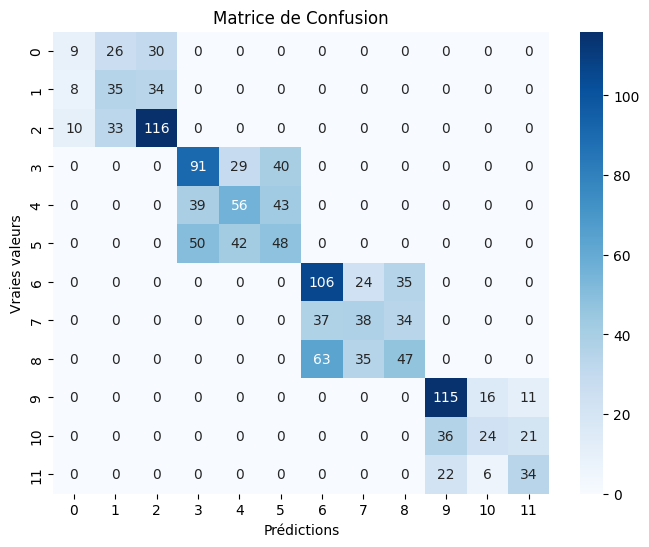


Prédictions pour `Prospecting` :
         account    sales_agent  predicted_engagement_month
8300  Green-Plus  Anna Snelling                         7.0
8307   Plusstrip  Anna Snelling                         7.0
8308    Zumgoity  Anna Snelling                         7.0
8311      Hatfan  Anna Snelling                         7.0
8312      Sumace  Anna Snelling                         7.0


C:\Users\liman\AppData\Local\Temp\ipykernel_102296\4170503284.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prospecting_data["predicted_engagement_month"] = rf_model.predict(prospecting_features)


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Séparer les données entre `Prospecting` et autres
prospecting_data = processed_df[processed_df["deal_stage"] == "Prospecting"]
training_data = processed_df[processed_df["deal_stage"] != "Prospecting"]

# 2. Sélectionner les features et la target pour l'entraînement
features = [
    'revenue', 'number_of_employees', 'sales_price', 'sales_cycle_duration',
    'company_age', 'engagement_quarter', 'product_complexity',
    'agent_conversion_rate', 'agent_avg_deal_value', 'revenue_per_employee',
]
target = 'engagement_month'

# Gérer les valeurs manquantes (remplacer ou supprimer les lignes avec des NaN)
training_data = training_data.dropna(subset=features + [target])

X = training_data[features]
y = training_data[target]

# Encodage des variables catégoriques
X = pd.get_dummies(X, drop_first=True)

# Division des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entraîner le modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Évaluer le modèle
y_pred = rf_model.predict(X_test)
print("Classification Report :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.show()

# 5. Prédiction pour les opportunités `Prospecting`
prospecting_features = prospecting_data[features]
prospecting_features = pd.get_dummies(prospecting_features, drop_first=True)

# Aligner les colonnes avec celles du modèle
prospecting_features = prospecting_features.reindex(columns=X.columns, fill_value=0)

prospecting_data["predicted_engagement_month"] = rf_model.predict(prospecting_features)

# Résultats des prédictions
print("\nPrédictions pour `Prospecting` :")
print(prospecting_data[["account", "sales_agent", "predicted_engagement_month"]].head())

# Sauvegarder les résultats
prospecting_data.to_csv("predicted_prospecting_engagement_month.csv", index=False)


En complétant le dataset principal processed_df avec les prédictions pour les opportunités en Prospecting (par exemple, en ajoutant la colonne predicted_engagement_month), nous enrichissons les données disponibles pour les modèles ultérieurs. Cela permet aux modèles suivants, comme celui pour la prédiction de deal_stage, de bénéficier d'une information plus complète et précise, ce qui peut améliorer leur performance.

In [14]:
# Ajouter les prédictions au dataset principal
processed_df = processed_df.copy()  # Faire une copie pour éviter les modifications directes

# Remplacer les valeurs manquantes de `engagement_month` par les prédictions
processed_df.loc[processed_df["deal_stage"] == "Prospecting", "engagement_month"] = prospecting_data["predicted_engagement_month"]

# Vérification des modifications
print("\nDataset enrichi :")
print(processed_df.info())

# Sauvegarder le dataset enrichi
processed_df.to_csv("enriched_crm_data.csv", index=False)
print("Dataset enrichi sauvegardé sous 'enriched_crm_data.csv'")



Dataset enrichi :
<class 'pandas.core.frame.DataFrame'>
Index: 7375 entries, 0 to 8791
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   sales_agent                    7375 non-null   object  
 1   account                        7375 non-null   object  
 2   deal_stage                     7375 non-null   object  
 3   close_value                    6711 non-null   float64 
 4   year_founded_at                7375 non-null   float64 
 5   revenue                        7375 non-null   float64 
 6   number_of_employees            7375 non-null   float64 
 7   sales_price                    7375 non-null   int64   
 8   sales_cycle_duration           7375 non-null   float64 
 9   company_size                   7375 non-null   category
 10  company_age                    7375 non-null   float64 
 11  company_age_category           7375 non-null   category
 12  is_won              

In [15]:
processed_df

,sales_agent,account,deal_stage,close_value,year_founded_at,revenue,number_of_employees,sales_price,sales_cycle_duration,company_size,...,product_GTX Basic,product_GTX Plus Basic,product_GTX Plus Pro,product_GTX Pro,product_MG Advanced,product_MG Special,series_GTK,series_GTX,series_MG,revenue_per_employee
0,Moses Frase,Cancity,Won,1054.0,2001.0,718.62,2448.0,1096,132.000000,Medium,...,0,1,0,0,0,0,False,True,False,0.293554
1,Darcel Schlecht,Isdom,Won,4514.0,2002.0,3178.24,4540.0,4821,137.000000,Medium,...,0,0,0,1,0,0,False,True,False,0.700053
2,Darcel Schlecht,Cancity,Won,50.0,2001.0,718.62,2448.0,55,133.000000,Medium,...,0,0,0,0,0,1,False,False,True,0.293554
3,Moses Frase,Codehow,Won,588.0,1998.0,2714.90,2641.0,550,135.000000,Medium,...,1,0,0,0,0,0,False,True,False,1.027982
4,Zane Levy,Hatfan,Won,517.0,1982.0,792.46,1299.0,550,128.000000,Medium,...,1,0,0,0,0,0,False,True,False,0.610054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,Versie Hillebrand,Konmatfix,Prospecting,NaN,1985.0,375.43,1190.0,55,47.985397,Medium,...,0,0,0,0,0,1,False,False,True,0.315487
8762,Versie Hillebrand,Opentech,Prospecting,NaN,1994.0,355.23,853.0,55,47.985397,Small,...,0,0,0,0,0,1,False,False,True,0.416448
8763,Versie Hillebrand,Rundofase,Prospecting,NaN,1983.0,1008.06,1238.0,55,47.985397,Medium,...,0,0,0,0,0,1,False,False,True,0.814265
8790,Versie Hillebrand,Ganjaflex,Prospecting,NaN,1995.0,5158.71,17479.0,3393,47.985397,Enterprise,...,0,0,0,0,1,0,False,False,True,0.295138


#### Prédiction de deal_stage des opportunités en Engaging ou Prospecting
Pour prédire si les opportunités en Engaging ou Prospecting vont devenir Won ou Lost, nous allons utiliser la colonne is_won (1 pour Won, 0 pour Lost) comme variable cible.

Si nous utilisons la colonne is_won comme variable cible et que ses valeurs sont déjà définies à 0 pour les deal_stage "Engaging" et "Prospecting", cela pourrait biaiser notre modèle. Il est important que ces valeurs soient nulles pour indiquer qu'elles ne sont pas encore déterminées et qu'elles doivent être prédites.

Raisonnement corrigé :
Pourquoi cela est un problème ?

La valeur 0 (qui signifie "Lost") pour les opportunités en Engaging et Prospecting fausse les données d'entraînement car elle indique que ces opportunités sont déjà classées comme "Lost", ce qui n'est pas le cas. Ces opportunités n'ont pas encore abouti et leur état est inconnu.
Solution appropriée :

Remplacer les valeurs de is_won par NaN pour les deal_stage "Engaging" et "Prospecting". Ainsi, ces lignes seront correctement exclues de l'entraînement et utilisées uniquement pour les prédictions.



Classification Report :
              precision    recall  f1-score   support

         0.0       0.47      0.26      0.33       507
         1.0       0.65      0.82      0.72       836

    accuracy                           0.61      1343
   macro avg       0.56      0.54      0.53      1343
weighted avg       0.58      0.61      0.58      1343



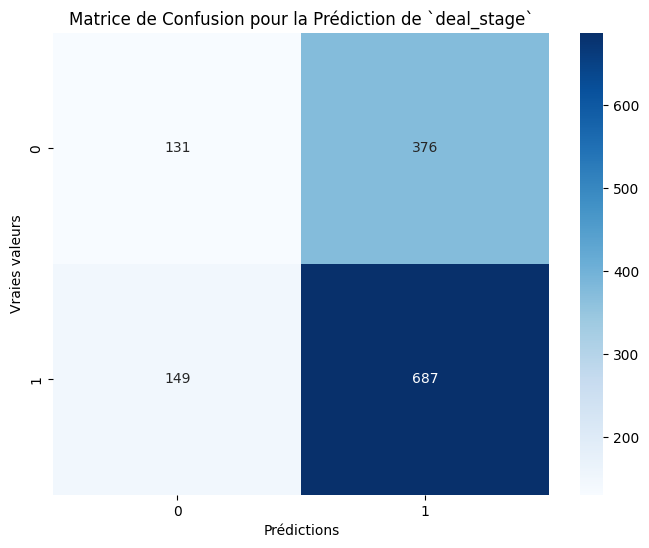


Prédictions pour `Engaging` et `Prospecting` :
       account      sales_agent predicted_deal_stage
25   Ganjaflex  Maureen Marcano                  Won
64  Green-Plus  Maureen Marcano                  Won
79      Cheers    Corliss Cosme                  Won
85  Lexiqvolax   Markita Hansen                  Won
89     J-Texon  Daniell Hammack                  Won


C:\Users\liman\AppData\Local\Temp\ipykernel_102296\2392800609.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engaging_prospecting_data["predicted_is_won"] = rf_model.predict(engaging_prospecting_features)
C:\Users\liman\AppData\Local\Temp\ipykernel_102296\2392800609.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engaging_prospecting_data["predicted_deal_stage"] = engaging_prospecting_data["predicted_is_won"].apply(


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Corriger la colonne `is_won`
# Remplacer `is_won` par NaN pour les opportunités en `Engaging` et `Prospecting`
processed_df.loc[processed_df["deal_stage"].isin(["Engaging", "Prospecting"]), "is_won"] = pd.NA

# Séparer les données pour entraînement et prédiction
# Opportunités avec des `deal_stage` `Engaging` ou `Prospecting`
engaging_prospecting_data = processed_df[processed_df["deal_stage"].isin(["Engaging", "Prospecting"])]

# Opportunités avec des `deal_stage` `Won` ou `Lost` (données d'entraînement)
training_data = processed_df[processed_df["deal_stage"].isin(["Won", "Lost"])]

# 2. Préparation des données
# Features et cible
features = [
    'revenue', 'number_of_employees', 'sales_price', 'sales_cycle_duration',
    'company_age', 'engagement_month', 'engagement_quarter', 'product_complexity',
    'agent_conversion_rate', 'agent_avg_deal_value', 'revenue_per_employee'
]
target = 'is_won'

# Gérer les valeurs manquantes
training_data = training_data.dropna(subset=features + [target])

X = training_data[features]
y = training_data[target]

# Encodage des variables catégoriques
X = pd.get_dummies(X, drop_first=True)

# Division des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Évaluation du modèle
y_pred = rf_model.predict(X_test)
print("Classification Report :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion pour la Prédiction de `deal_stage`")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.show()

# 5. Prédiction pour `Engaging` et `Prospecting`
engaging_prospecting_features = engaging_prospecting_data[features]
engaging_prospecting_features = pd.get_dummies(engaging_prospecting_features, drop_first=True)

# Aligner les colonnes avec celles du modèle
engaging_prospecting_features = engaging_prospecting_features.reindex(columns=X.columns, fill_value=0)

engaging_prospecting_data["predicted_is_won"] = rf_model.predict(engaging_prospecting_features)

# Conversion des prédictions en `deal_stage`
engaging_prospecting_data["predicted_deal_stage"] = engaging_prospecting_data["predicted_is_won"].apply(
    lambda x: "Won" if x == 1 else "Lost"
)

# Résultats des prédictions
print("\nPrédictions pour `Engaging` et `Prospecting` :")
print(engaging_prospecting_data[["account", "sales_agent", "predicted_deal_stage"]].head())

# Sauvegarde des résultats
engaging_prospecting_data.to_csv("predicted_engaging_prospecting_deal_stage.csv", index=False)


Enrichir le dataset principal processed_df avec les prédictions de is_won pour les opportunités en Engaging et Prospecting est une approche logique et cohérente. Cela permet d'avoir un dataset encore plus complet pour les analyses ou les modèles ultérieurs, comme la prédiction de close_value ou d'autres variables.

In [17]:
# Copier le dataset principal pour éviter de modifier l'original
processed_df = processed_df.copy()

# Ajouter les prédictions pour `is_won`
processed_df.loc[processed_df["deal_stage"].isin(["Engaging", "Prospecting"]), "is_won"] = engaging_prospecting_data["predicted_is_won"].values

# Ajouter les prédictions pour `deal_stage`
processed_df.loc[processed_df["deal_stage"].isin(["Engaging", "Prospecting"]), "deal_stage"] = engaging_prospecting_data["predicted_deal_stage"].values

# Vérification des modifications
print("\nDataset enrichi avec les prédictions de `is_won` et `deal_stage` :")
print(processed_df.info())

# Sauvegarde du dataset enrichi
processed_df.to_csv("enriched_crm_data_with_deal_stage.csv", index=False)
print("Dataset enrichi sauvegardé sous 'enriched_crm_data_with_deal_stage.csv'")



Dataset enrichi avec les prédictions de `is_won` et `deal_stage` :
<class 'pandas.core.frame.DataFrame'>
Index: 7375 entries, 0 to 8791
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   sales_agent                    7375 non-null   object  
 1   account                        7375 non-null   object  
 2   deal_stage                     7375 non-null   object  
 3   close_value                    6711 non-null   float64 
 4   year_founded_at                7375 non-null   float64 
 5   revenue                        7375 non-null   float64 
 6   number_of_employees            7375 non-null   float64 
 7   sales_price                    7375 non-null   int64   
 8   sales_cycle_duration           7375 non-null   float64 
 9   company_size                   7375 non-null   category
 10  company_age                    7375 non-null   float64 
 11  company_age_category           7

In [18]:
processed_df

,sales_agent,account,deal_stage,close_value,year_founded_at,revenue,number_of_employees,sales_price,sales_cycle_duration,company_size,...,product_GTX Basic,product_GTX Plus Basic,product_GTX Plus Pro,product_GTX Pro,product_MG Advanced,product_MG Special,series_GTK,series_GTX,series_MG,revenue_per_employee
0,Moses Frase,Cancity,Won,1054.0,2001.0,718.62,2448.0,1096,132.000000,Medium,...,0,1,0,0,0,0,False,True,False,0.293554
1,Darcel Schlecht,Isdom,Won,4514.0,2002.0,3178.24,4540.0,4821,137.000000,Medium,...,0,0,0,1,0,0,False,True,False,0.700053
2,Darcel Schlecht,Cancity,Won,50.0,2001.0,718.62,2448.0,55,133.000000,Medium,...,0,0,0,0,0,1,False,False,True,0.293554
3,Moses Frase,Codehow,Won,588.0,1998.0,2714.90,2641.0,550,135.000000,Medium,...,1,0,0,0,0,0,False,True,False,1.027982
4,Zane Levy,Hatfan,Won,517.0,1982.0,792.46,1299.0,550,128.000000,Medium,...,1,0,0,0,0,0,False,True,False,0.610054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,Versie Hillebrand,Konmatfix,Lost,NaN,1985.0,375.43,1190.0,55,47.985397,Medium,...,0,0,0,0,0,1,False,False,True,0.315487
8762,Versie Hillebrand,Opentech,Won,NaN,1994.0,355.23,853.0,55,47.985397,Small,...,0,0,0,0,0,1,False,False,True,0.416448
8763,Versie Hillebrand,Rundofase,Won,NaN,1983.0,1008.06,1238.0,55,47.985397,Medium,...,0,0,0,0,0,1,False,False,True,0.814265
8790,Versie Hillebrand,Ganjaflex,Won,NaN,1995.0,5158.71,17479.0,3393,47.985397,Enterprise,...,0,0,0,0,1,0,False,False,True,0.295138


Évaluation du modèle :
Mean Squared Error : 126081.5745273064
R2 Score : 0.9853461845020612


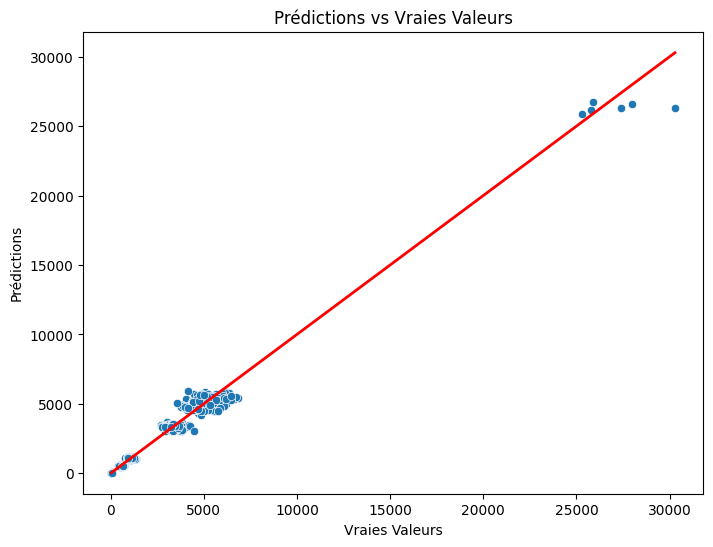

Dataset enrichi sauvegardé avec les prédictions de close_value.


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mettre à jour `close_value` pour les opportunités "Lost" avec des valeurs manquantes
processed_df.loc[
    (processed_df["deal_stage"] == "Lost") & (processed_df["close_value"].isna()), 
    "close_value"
] = 0

# 2. Filtrer les opportunités "Won" pour la prédiction
won_data = processed_df[processed_df["deal_stage"] == "Won"]

# Ensemble d'entraînement : opportunités "Won" avec `close_value` existant
training_data = won_data.dropna(subset=["close_value"])

# Ensemble de prédiction : opportunités "Won" avec `close_value` manquant
prediction_data = won_data[won_data["close_value"].isna()]

# Sélection des features et de la variable cible
features = [
    'sales_price', 'revenue', 'number_of_employees', 'sales_cycle_duration',
    'company_age', 'engagement_month', 'engagement_quarter',
    'product_complexity', 'agent_conversion_rate', 'agent_avg_deal_value',
    'revenue_per_employee'
]
target = 'close_value'

# Gérer les valeurs manquantes dans les features
training_data = training_data.dropna(subset=features)

X = training_data[features]
y = training_data[target]

# Encodage des variables catégoriques
X = pd.get_dummies(X, drop_first=True)

# Division des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entraîner un modèle de régression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Évaluer le modèle
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Évaluation du modèle :")
print(f"Mean Squared Error : {mse}")
print(f"R2 Score : {r2}")

# Matrice de dispersion des prédictions vs vraies valeurs
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Prédictions vs Vraies Valeurs")
plt.xlabel("Vraies Valeurs")
plt.ylabel("Prédictions")
plt.show()

# 4. Prédire les valeurs manquantes de `close_value`
prediction_features = prediction_data[features]
prediction_features = pd.get_dummies(prediction_features, drop_first=True)

# Aligner les colonnes avec celles du modèle
prediction_features = prediction_features.reindex(columns=X.columns, fill_value=0)

predicted_close_values = rf_regressor.predict(prediction_features)

# Mettre à jour les valeurs manquantes dans processed_df
processed_df.loc[prediction_data.index, "close_value"] = predicted_close_values

# Sauvegarder le dataset enrichi
processed_df.to_csv("enriched_crm_data_with_complete_close_value.csv", index=False)
print("Dataset enrichi sauvegardé avec les prédictions de close_value.")


#### Dataset final avec toutes les prédictions de engagement_month, deal_stage et close_value.


In [20]:
processed_df.head()

,sales_agent,account,deal_stage,close_value,year_founded_at,revenue,number_of_employees,sales_price,sales_cycle_duration,company_size,...,product_GTX Basic,product_GTX Plus Basic,product_GTX Plus Pro,product_GTX Pro,product_MG Advanced,product_MG Special,series_GTK,series_GTX,series_MG,revenue_per_employee
0,Moses Frase,Cancity,Won,1054.0,2001.0,718.62,2448.0,1096,132.0,Medium,...,0,1,0,0,0,0,False,True,False,0.293554
1,Darcel Schlecht,Isdom,Won,4514.0,2002.0,3178.24,4540.0,4821,137.0,Medium,...,0,0,0,1,0,0,False,True,False,0.700053
2,Darcel Schlecht,Cancity,Won,50.0,2001.0,718.62,2448.0,55,133.0,Medium,...,0,0,0,0,0,1,False,False,True,0.293554
3,Moses Frase,Codehow,Won,588.0,1998.0,2714.90,2641.0,550,135.0,Medium,...,1,0,0,0,0,0,False,True,False,1.027982
4,Zane Levy,Hatfan,Won,517.0,1982.0,792.46,1299.0,550,128.0,Medium,...,1,0,0,0,0,0,False,True,False,0.610054


#### Clustering

Clustering des clients (account) et des agents commerciaux (sales_agent)
Le clustering permet d’identifier des groupes homogènes parmi les clients et les agents en fonction de caractéristiques spécifiques. Cela peut aider à optimiser les stratégies de vente et de marketing, ainsi qu’à mieux comprendre les performances des agents.

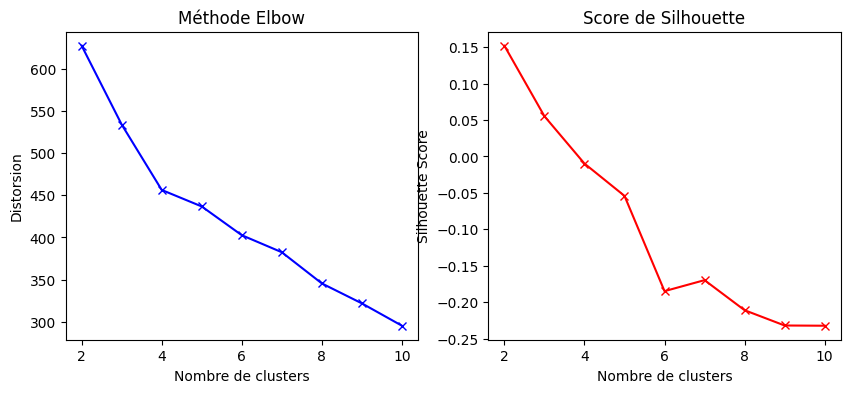

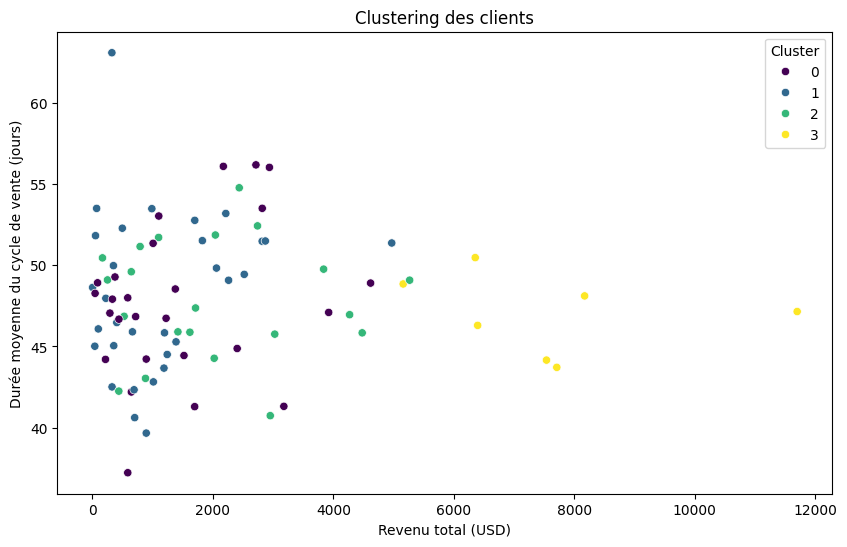

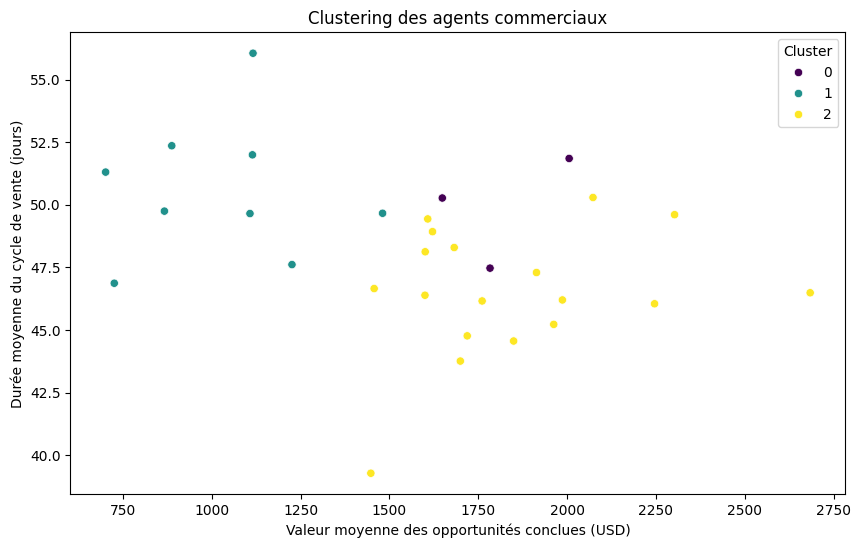

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour appliquer le clustering
def apply_clustering(data, features, n_clusters=3, scaler=None):
    # Standardisation des données
    if scaler is None:
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data[features])
    else:
        data_scaled = scaler.transform(data[features])
    
    # Application de K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    
    # Ajout des clusters au dataset
    data['cluster'] = clusters
    
    return data, kmeans, scaler

# 1. Clustering des clients
client_features = [
    'revenue', 'number_of_employees', 'sales_cycle_duration',
    'agent_conversion_rate', 'agent_avg_deal_value', 'revenue_per_employee',
    'close_value', 'sales_price', 'is_won', 'product_complexity'
]
clients = processed_df.groupby('account')[client_features].mean().dropna()

# Trouver le nombre optimal de clusters pour les clients
distortions = []
silhouettes = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(StandardScaler().fit_transform(clients))
    distortions.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(clients, clusters))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distorsion')
plt.title('Méthode Elbow')

plt.subplot(1, 2, 2)
plt.plot(K, silhouettes, 'rx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')
plt.title('Score de Silhouette')
plt.show()

# Appliquer le clustering avec k optimal
n_clusters_clients = 4  # Choisir en fonction des graphes
clients, kmeans_clients, scaler_clients = apply_clustering(clients, client_features, n_clusters=n_clusters_clients)

# Visualisation des clusters clients
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=clients,
    x='revenue', y='sales_cycle_duration', hue='cluster', palette='viridis'
)
plt.title("Clustering des clients")
plt.xlabel("Revenu total (USD)")
plt.ylabel("Durée moyenne du cycle de vente (jours)")
plt.legend(title="Cluster")
plt.show()

# 2. Clustering des agents commerciaux
agent_features = [
    'agent_conversion_rate', 'agent_avg_deal_value', 'close_value', 'sales_cycle_duration', 'is_won', 'product_complexity'
]
agents = processed_df.groupby('sales_agent')[agent_features].mean().dropna()

# Appliquer le clustering pour les agents commerciaux
n_clusters_agents = 3  # À ajuster après observation
agents, kmeans_agents, scaler_agents = apply_clustering(agents, agent_features, n_clusters=n_clusters_agents)

# Visualisation des clusters agents
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=agents,
    x='close_value', y='sales_cycle_duration', hue='cluster', palette='viridis'
)
plt.title("Clustering des agents commerciaux")
plt.xlabel("Valeur moyenne des opportunités conclues (USD)")
plt.ylabel("Durée moyenne du cycle de vente (jours)")
plt.legend(title="Cluster")
plt.show()

# Sauvegarder les résultats
clients.to_csv("clustered_clients.csv")
agents.to_csv("clustered_agents.csv")


#### Matching Clients-Agents


Top 10 des combinaisons agent-client par succès :
         sales_agent      account  total_revenue  avg_close_value  \
0      Anna Snelling   Betasoloin         251.41      3293.910000   
661  Kary Hendrixson    Ontomedia         882.12      1057.430000   
636  Kary Hendrixson      Conecom        3041.32      5080.850000   
639  Kary Hendrixson  Donquadtech        1712.68      1093.500000   
640  Kary Hendrixson     Dontechi        4618.00       564.370000   
643  Kary Hendrixson      Finhigh        1102.43       535.580000   
645  Kary Hendrixson   Funholding        2819.50      4763.230000   
653  Kary Hendrixson  Iselectrics        1054.22       558.050000   
658  Kary Hendrixson   Lexiqvolax       11332.23      2104.857143   
662  Kary Hendrixson     Opentech         710.46      2825.405000   

     total_opportunities  success_rate  
0                      1           1.0  
661                    1           1.0  
636                    2           1.0  
639                    1 

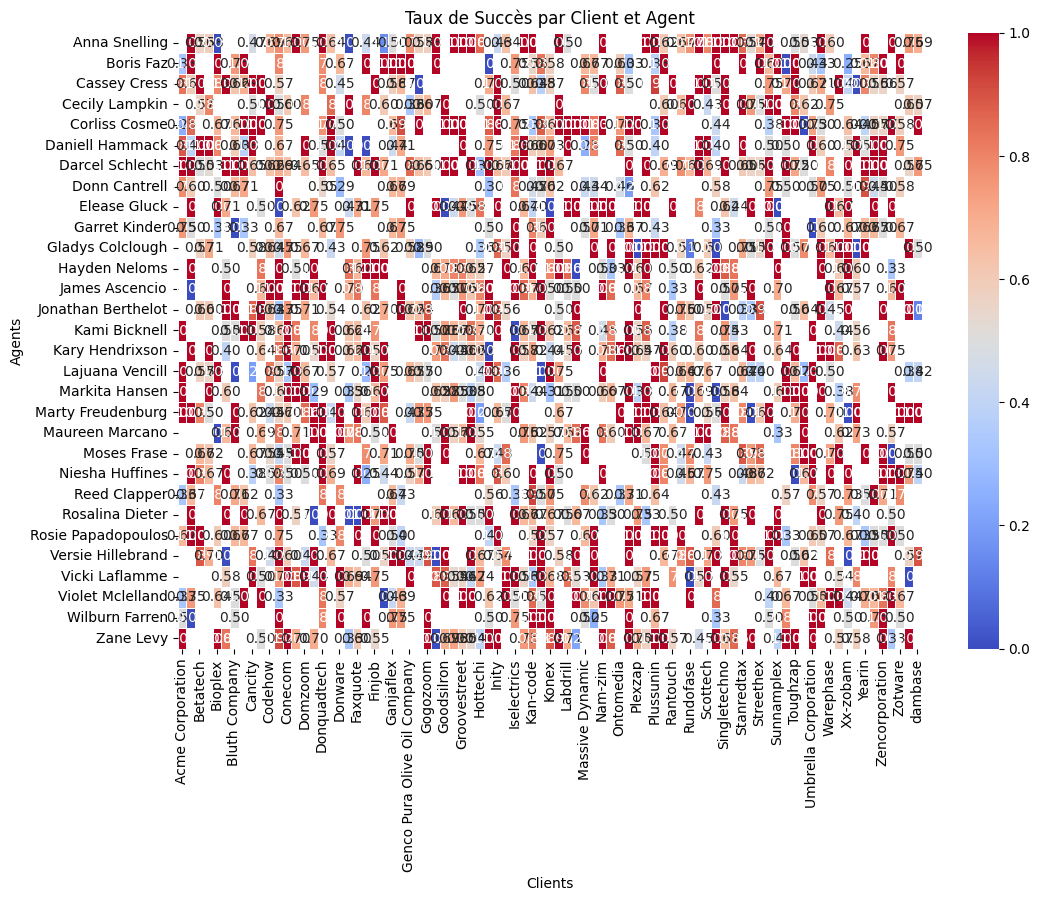

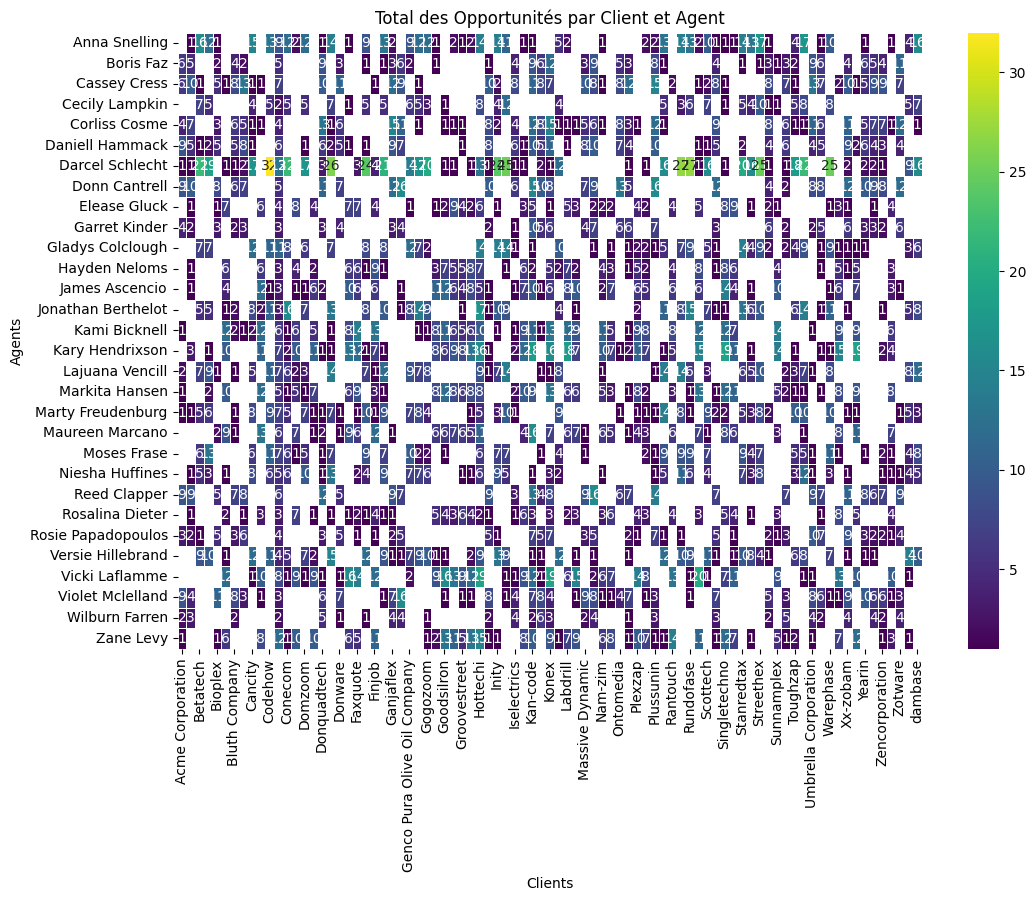

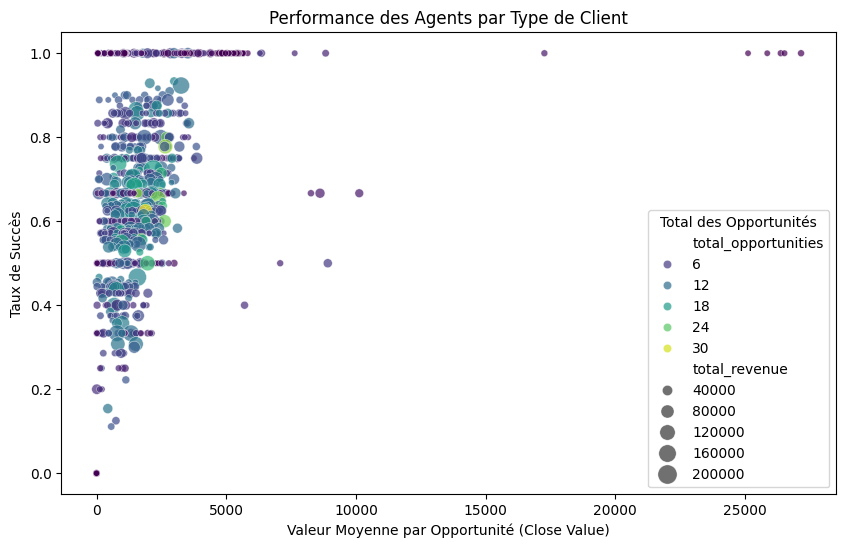

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrégation des données pour les clients et agents
client_agent_kpi = processed_df.groupby(['sales_agent', 'account']).agg(
    total_revenue=('revenue', 'sum'),
    avg_close_value=('close_value', 'mean'),
    total_opportunities=('is_won', 'count'),
    success_rate=('is_won', 'mean')  # Proportion de "Won"
).reset_index()

# Remplir les NaN avec 0 pour éviter les erreurs dans l'analyse
client_agent_kpi.fillna(0, inplace=True)

# Trier les données par succès
client_agent_kpi = client_agent_kpi.sort_values(by='success_rate', ascending=False)

# Top 10 des combinaisons agent-client par taux de succès
top_success_combinations = client_agent_kpi.head(10)
print("\nTop 10 des combinaisons agent-client par succès :")
print(top_success_combinations)

# Heatmap : Taux de succès par client et agent
pivot_success_rate = client_agent_kpi.pivot(
    index='sales_agent', columns='account', values='success_rate'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_success_rate, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Taux de Succès par Client et Agent")
plt.xlabel("Clients")
plt.ylabel("Agents")
plt.show()

# Heatmap : Nombre total d'opportunités par client et agent
pivot_total_opportunities = client_agent_kpi.pivot(
    index='sales_agent', columns='account', values='total_opportunities'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_total_opportunities, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title("Total des Opportunités par Client et Agent")
plt.xlabel("Clients")
plt.ylabel("Agents")
plt.show()

# Scatterplot des performances des agents par type de client
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=client_agent_kpi,
    x='avg_close_value',
    y='success_rate',
    hue='total_opportunities',
    size='total_revenue',
    sizes=(20, 200),
    palette='viridis',
    alpha=0.7
)
plt.title("Performance des Agents par Type de Client")
plt.xlabel("Valeur Moyenne par Opportunité (Close Value)")
plt.ylabel("Taux de Succès")
plt.legend(title="Total des Opportunités")
plt.show()
